<a href="https://colab.research.google.com/github/mualal/notebooks-source/blob/master/7_exploration_radius.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exploration_radius(
    kt: float,  # мДа * мин
    phi=0.14,  # в долях
    mu=10,  # сПз
    c_t=20e-4  # атм^(-1)
) -> float:
    return 0.037 * np.sqrt(kt / (phi * mu * c_t))

In [3]:
k = 32  # мДа
t = 7343  # мин

print(
    f'За {t} мин давление распространится примерно на {round(exploration_radius(k * t), 2)} метра'
) 

За 7343 мин давление распространится примерно на 338.95 метра


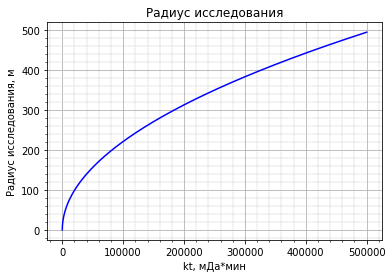

In [4]:
# значения в диапазоне возможных значений произведения проницаемости и времени
kt = np.arange(
    start=0,
    stop=500000,
    step=5
)

# зависимость радиуса исследования от произведения проницаемости и времени
plt.figure()
plt.title('Радиус исследования')
plt.xlabel('kt, мДа*мин')
plt.ylabel('Радиус исследования, м')
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle='--', linewidth=0.4)
plt.plot(kt, exploration_radius(kt), c='blue')
plt.show()

## Решение обратной задачи

In [5]:
# функция для вычисления времени исследования по заданному радиусу исследования
def time_with_given_exploration_radius(
    r_inv: float,
    k=32,  # мДа
    phi=0.14,  # в долях
    mu=10,  # сПз
    c_t=20e-4  # атм^(-1)
) -> float:
    return phi * mu * c_t / k * (r_inv / 0.037) ** 2

In [6]:
# зададим радиус исследования
r_inv = 100  # м

print(
    f'При радиусе исследования r_inv={r_inv} м время исследования \n'
    f'будет составлять примерно {round(time_with_given_exploration_radius(r_inv), 1)} мин'
)

При радиусе исследования r_inv=100 м время исследования 
будет составлять примерно 639.2 мин
